In [1]:
import enum
from dataclasses import dataclass, field

# State & Action Spaces


**State space**

- A state is simply a graph with node types and edge types
- We define initial state as a graph with one node.

**Action space**

- AddNode: add a new node
- AddEdge: add a new edge
- Stop: end the episode

In [2]:
class NodeType(enum.Enum):
    C = enum.auto()
    N = enum.auto()
    O = enum.auto()
    S = enum.auto()
    P = enum.auto()
    F = enum.auto()
    I = enum.auto()
    Cl = enum.auto()
    Br = enum.auto()



class EdgeType(enum.Enum):
    SINGLE = enum.auto()
    DOUBLE = enum.auto()
    TRIPLE = enum.auto()

    

class ActionType(enum.Enum):
    AddNode = enum.auto()
    AddEdge = enum.auto()
    STOP = enum.auto()
        
        
@dataclass
class State:
    node_types: list[NodeType] = field(default_factory=list)
    edge_types: list[EdgeType] = field(default_factory=list)
    edge_list: list[tuple[int, int]] = field(default_factory=list)

    num_node: int = field(default_factory=int, repr=False)
    num_edge: int = field(default_factory=int, repr=False)
    _edge_set: set[tuple[int, int]] = field(default_factory=set, repr=False)
        
    def __post_init__(self):
        self.num_node = len(self.node_types)
        self.num_edges = len(self.edge_types)
        self._edge_set = set(self.edge_list)

    def add_node(self, node_type: NodeType):
        self.node_types.append(node_type)
        self.num_node += 1

    def add_edge(self, i: int, j: int, edge_type: EdgeType):
        edge = (i, j) if i < j else (j, i)
        self.edge_types.append(edge_type)
        self.edge_list.append(edge)
        self._edge_set.add(edge)
        self.num_edge += 1
        
@dataclass
class Action:
    type: ActionType = None
    source: int = None
    target: int = None
    node_type: NodeType = None
    edge_type: EdgeType = None


class Trajectory:
    def __init__(self, states, actions):
        assert len(states) == len(actions)
        self.states = states
        self.actions = actions

    @property
    def last_state(self):
        return self.states[-1]

    def __len__(self):
        return len(self.states)

    def __repr__(self):
        return f"{self.__class__.__name__}(size: {len(self)})"


# Environment

This part of implementation is bit complicated, so you may just import `mol_env` and use it.

In [3]:
import mol_env as env

state = env.initial_state()
state

State(node_types=[C], edge_types=[], edge_list=[])

In [4]:
action = env.Action(
    type=env.ActionType.AddNode,
    node_type=env.NodeType.N
)
env.step(state, action)

(State(node_types=[C, N], edge_types=[], edge_list=[]), False)

In [5]:
caffeine = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
state = env.State.from_smiles(caffeine)
state

State(node_types=[C, N, C, N, C, C, C, O, N, C, O, N, C, C], edge_types=[SINGLE, SINGLE, DOUBLE, SINGLE, DOUBLE, SINGLE, DOUBLE, SINGLE, SINGLE, DOUBLE, SINGLE, SINGLE, SINGLE, SINGLE, SINGLE], edge_list=[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (6, 8), (8, 9), (9, 10), (9, 11), (11, 12), (8, 13), (5, 1), (11, 4)])

In [6]:
env.to_Data(state)

Data(edge_index=[2, 30], non_edge_index=[2, 78], node_type=[14], edge_type=[30], num_non_edges=78)

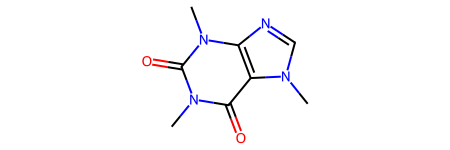

In [7]:
state.to_mol()

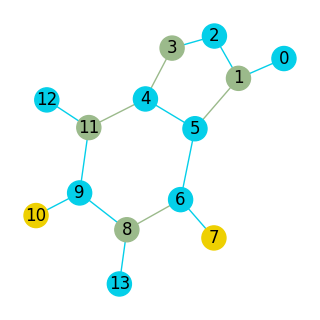

In [8]:
state.viz()

In [13]:
traj = env.get_bfs_trajectory(state)
traj

Trajectory(size: 29)

In [12]:
traj.states[:6]

[State(node_types=[C], edge_types=[], edge_list=[]),
 State(node_types=[C, N], edge_types=[], edge_list=[]),
 State(node_types=[C, N], edge_types=[SINGLE], edge_list=[(0, 1)]),
 State(node_types=[C, N, C], edge_types=[SINGLE], edge_list=[(0, 1)]),
 State(node_types=[C, N, C], edge_types=[SINGLE, SINGLE], edge_list=[(0, 1), (1, 2)]),
 State(node_types=[C, N, C, C], edge_types=[SINGLE, SINGLE], edge_list=[(0, 1), (1, 2)])]

In [11]:
traj.last_state

State(node_types=[C, N, C, C, N, C, C, N, O, N, C, C, C, O], edge_types=[SINGLE, SINGLE, SINGLE, DOUBLE, DOUBLE, SINGLE, SINGLE, SINGLE, DOUBLE, SINGLE, SINGLE, SINGLE, SINGLE, SINGLE, DOUBLE], edge_list=[(0, 1), (1, 2), (1, 3), (2, 4), (3, 5), (3, 6), (4, 5), (5, 7), (6, 8), (6, 9), (7, 10), (7, 11), (9, 10), (9, 12), (10, 13)])